In [1]:
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# ! pip install sklearn

In [3]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_boston
# boston = load_boston()

In [4]:
import numpy as np
import pandas as pd

boston = pd.read_csv('../data/boston.csv')
print(boston)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_url =  "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2,:], raw_df.values[1::2,:2]])
target = raw_df.values[1::2,2]
print(data.shape)
print(target.shape)

(506, 13)
(506,)


In [7]:
boston = pd.DataFrame(data)
boston.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
boston['MEDV']= target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
boston_chas_0 = boston.loc[boston['CHAS']==0, 'MEDV']
boston_chas_1 = boston.loc[boston['CHAS']==1, 'MEDV']
print(boston.shape)
print(boston_chas_0.shape)
print(boston_chas_1.shape)

(506, 14)
(471,)
(35,)


In [9]:
from scipy import stats
stats.ttest_ind(boston_chas_0, boston_chas_1)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

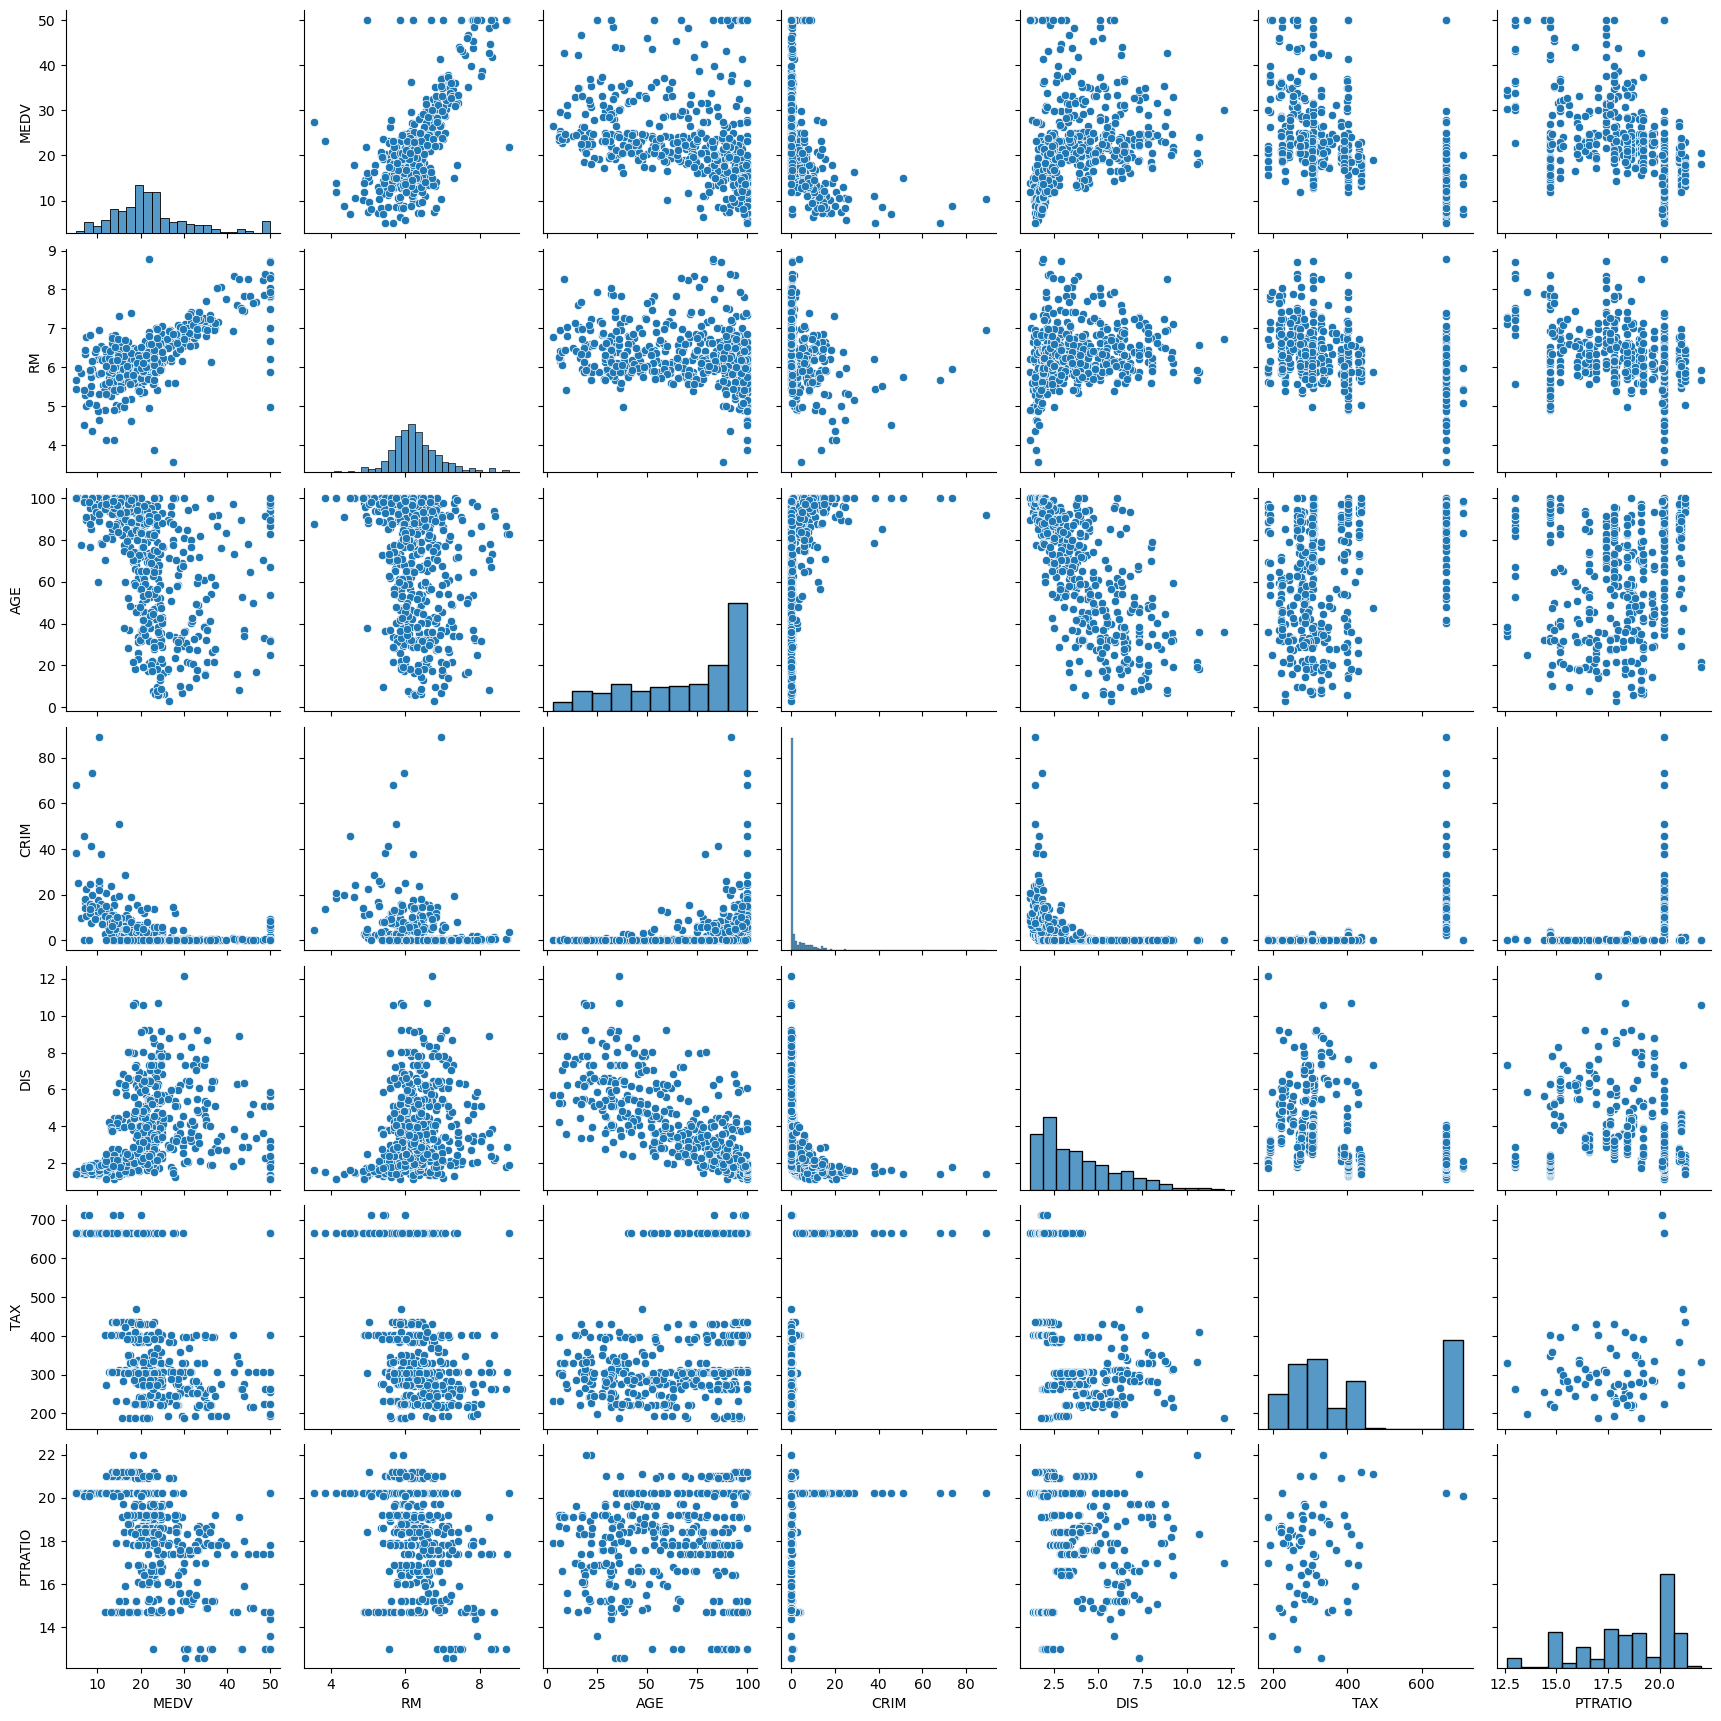

In [10]:
sns.pairplot(boston[['MEDV','RM','AGE','CRIM','DIS','TAX','PTRATIO']])

In [11]:
formula = 'MEDV ~ CRIM + ZN + INDUS + RM + + AGE + DIS + RAD + TAX + PTRATIO + LSTAT'

In [12]:
from statsmodels.formula.api import ols
regression_result = ols(formula, data=boston).fit()
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.69e-128
Time:                        12:27:52   Log-Likelihood:                -1521.5
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     495   BIC:                             3112.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.3398      4.242      6.916      0.000      21.005      37.674
CRIM          -0.1191      0.034     -3.511      0.000      -0.186      -0.052
ZN             0.0501      0.014      3.501      0.001       0.022       0.078
INDUS         -0.0462      0.061     -0.753      0.452      -0.167       0.074
RM             3.8655      0.432      8.955      0.000       3.017       4.714
AGE           -0.0108      0.013     -0.815      0.415      -0.037       0.015
DIS           -1.2306      0.199     -6.169      0.000      -1.623      -0.839
RAD            0.2638      0.068      3.889      0.000       0.131       0.397
TAX           -0.0155      0.004     -4.004      0.000      -0.023      -0.008
PTRATIO       -0.7651      0.128     -5.987      0.000      -1.016      -0.514
LSTAT         -0.5826      0.052    -11.213      0.000      -0.685      -0.480
==============================================================================
Omnibus:                      193.018   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              922.749
Skew:                           1.634   Prob(JB):                    4.24e-201
Kurtosis:                       8.753   Cond. No.                     8.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
sample = boston[boston.columns.difference(['MEDV','B','CHAS'])]
smaple1 = sample[:10][:]
smaple1

,AGE,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,65.2,0.00632,4.0900,2.31,4.98,0.538,15.3,1.0,6.575,296.0,18.0
1,78.9,0.02731,4.9671,7.07,9.14,0.469,17.8,2.0,6.421,242.0,0.0
2,61.1,0.02729,4.9671,7.07,4.03,0.469,17.8,2.0,7.185,242.0,0.0
3,45.8,0.03237,6.0622,2.18,2.94,0.458,18.7,3.0,6.998,222.0,0.0
4,54.2,0.06905,6.0622,2.18,5.33,0.458,18.7,3.0,7.147,222.0,0.0
5,58.7,0.02985,6.0622,2.18,5.21,0.458,18.7,3.0,6.430,222.0,0.0
6,66.6,0.08829,5.5605,7.87,12.43,0.524,15.2,5.0,6.012,311.0,12.5
7,96.1,0.14455,5.9505,7.87,19.15,0.524,15.2,5.0,6.172,311.0,12.5
8,100.0,0.21124,6.0821,7.87,29.93,0.524,15.2,5.0,5.631,311.0,12.5
9,85.9,0.17004,6.5921,7.87,17.10,0.524,15.2,5.0,6.004,311.0,12.5


In [15]:
sample1_predict = regression_result.predict(sample1)
print(sample1_predict)

0    30.871367
1    24.691586
2    30.813904
3    29.654840
4    28.743435
5    25.997849
6    22.886678
7    18.785269
8    10.201954
9    18.647628
dtype: float64


In [16]:
boston[:10]['MEDV']

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

In [17]:
data = {'CRIM':[0.062,0.045], 'ZN':[0.0,0.0], 'INDUS':[11.9,11.8], 'CHAS':[0,0],
        'NOX':[0.56,0.57], 'RM':[6.59,6.112], 'AGE':[69.1,76.1], 'DIS':[2.45,2.47],
        'RAD':[1.0,1.0], 'TAX':[21.0,21.0], 'PTRATIO':[21.0,21.0], 'LSTAT':[9.6,9.0]}
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2

,AGE,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,69.1,0.062,2.45,11.9,9.6,0.56,21.0,1.0,6.590,21.0,0.0
1,76.1,0.045,2.47,11.8,9.0,0.57,21.0,1.0,6.112,21.0,0.0


In [18]:
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    28.773831
1    27.182123
dtype: float64

In [20]:
from matplotlib import rc, font_manager
font_path='c:/Windows/Fonts/H2HDRM.TTF'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.rcParams['figure.figsize']=(10,9)

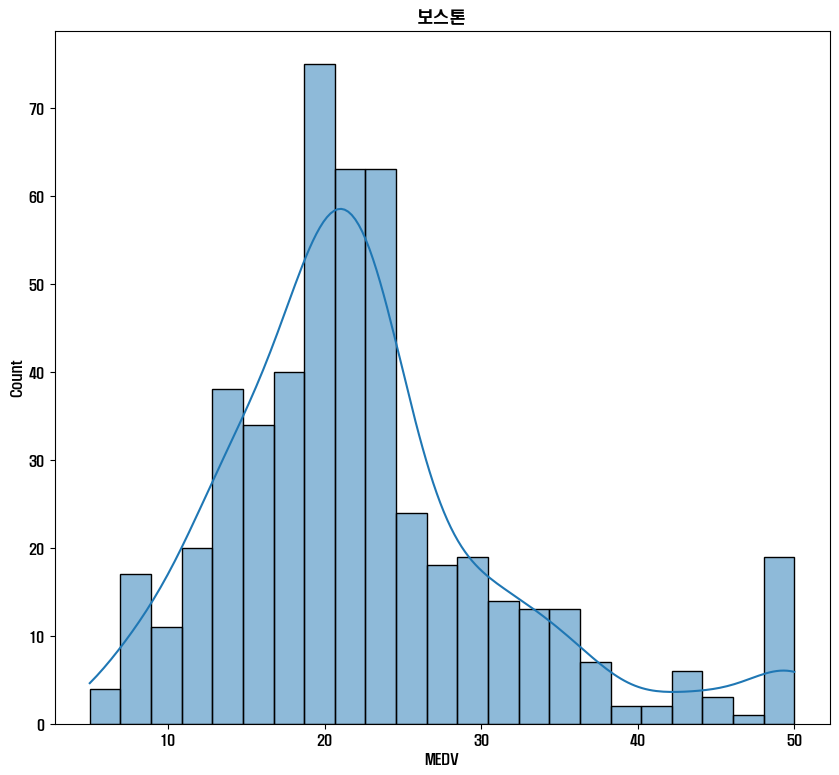

In [21]:
sns.histplot(data=boston['MEDV'], kde=True)
plt.title("보스톤")
plt.show()

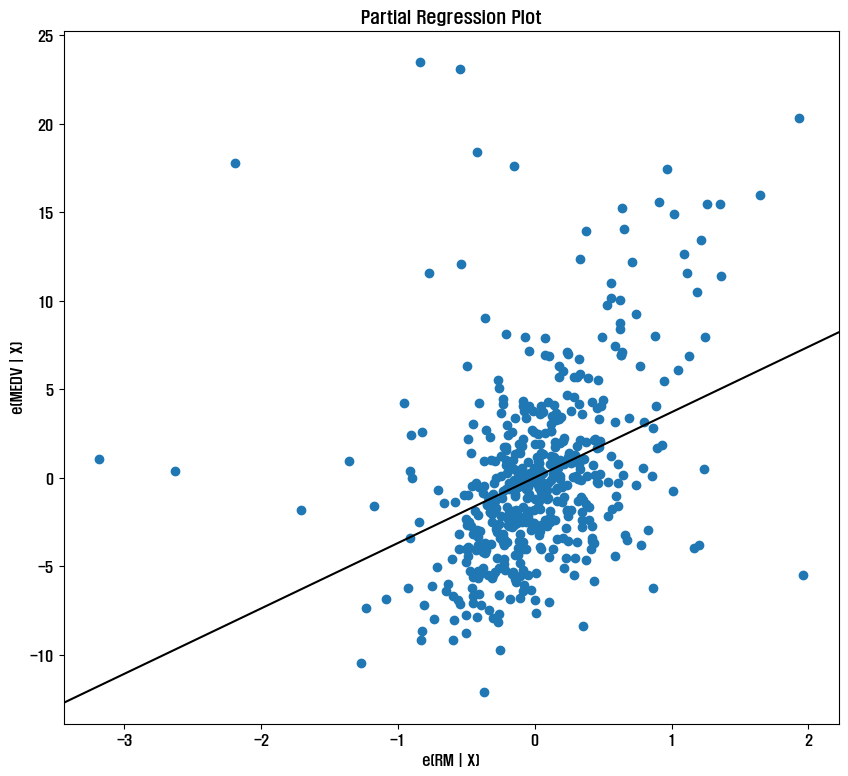

In [23]:
import statsmodels.api as sm

boston2 = boston.loc[:,boston.columns.difference(['B','CHAS'])]
boston2
plt.rcParams['axes.unicode_minus'] = False
others = list(set(boston2.columns).difference(set(['MEDV','RM'])))
p, resids = sm.graphics.plot_partregress('MEDV','RM', others, data=boston2, obs_labels=False, ret_coords=True)
plt.show()

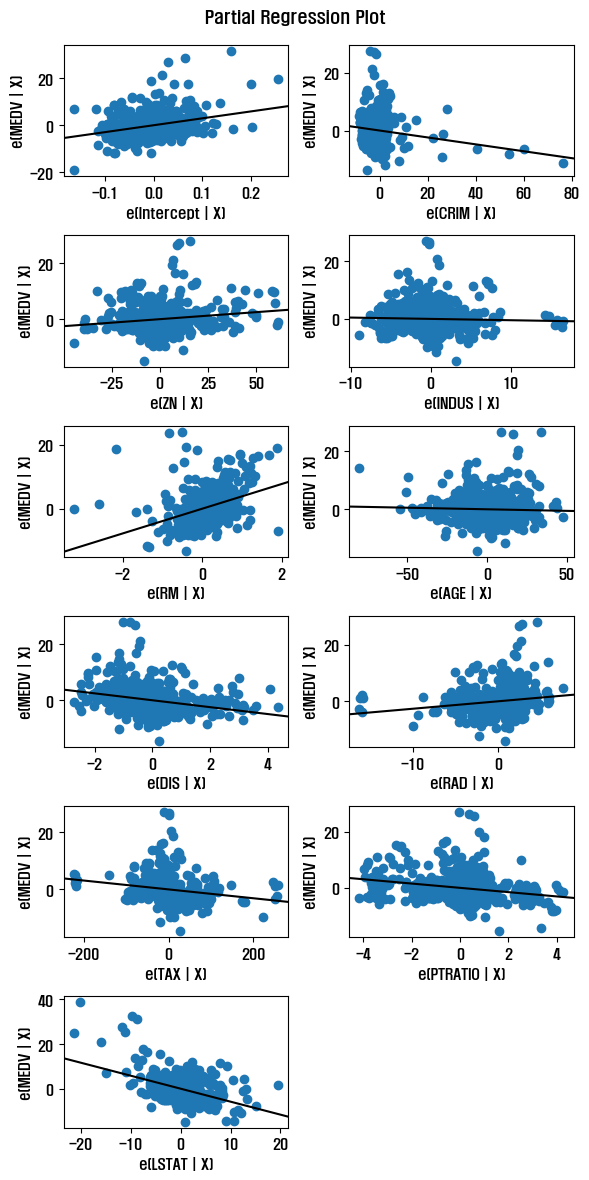

In [25]:
fig = plt.figure(figsize=(6,12))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()